<a href="https://colab.research.google.com/github/sameedsajid26/Data-Science-and-ML/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from matplotlib import pyplot as plt 
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster 
from sklearn.cluster import KMeans 
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn import datasets 
wine = datasets.load_wine()

In [ ]:
X = wine.data 

In [ ]:
wine.target[[10, 80, 140]]

array([0, 1, 2])

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
data=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])

#Check data with info function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [ ]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [ ]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
linked1 = linkage(data,'complete')

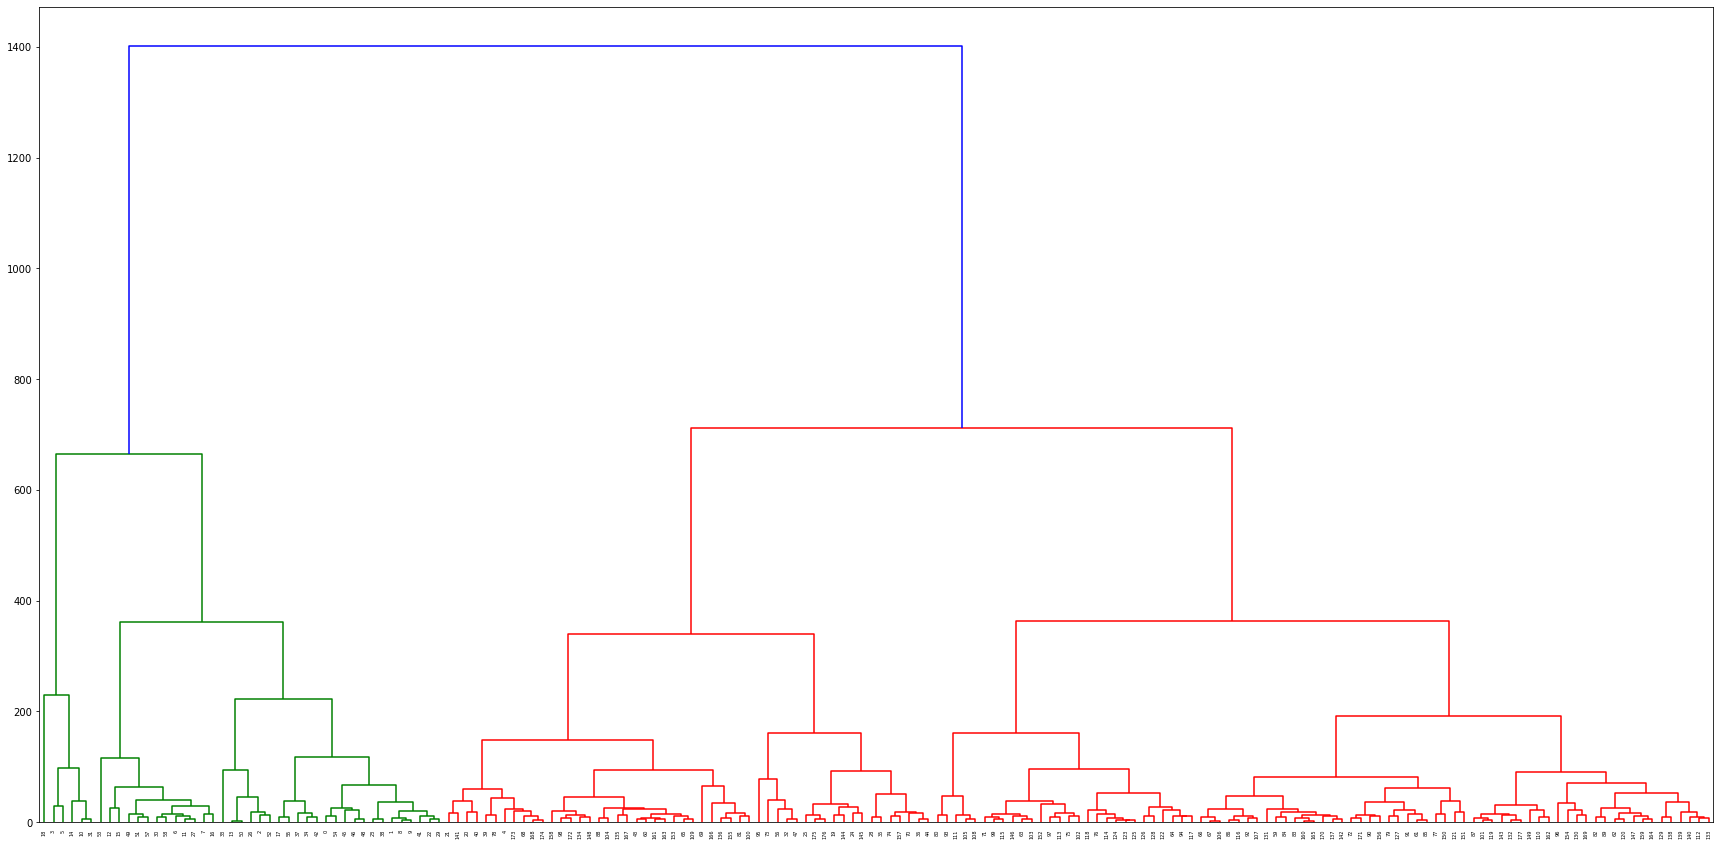

In [ ]:
#plot dendrogram
plt.figure(figsize=(30,15))
dendrogram(linked1)
plt.show()

In [ ]:
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
linked2 = linkage(data,'single')

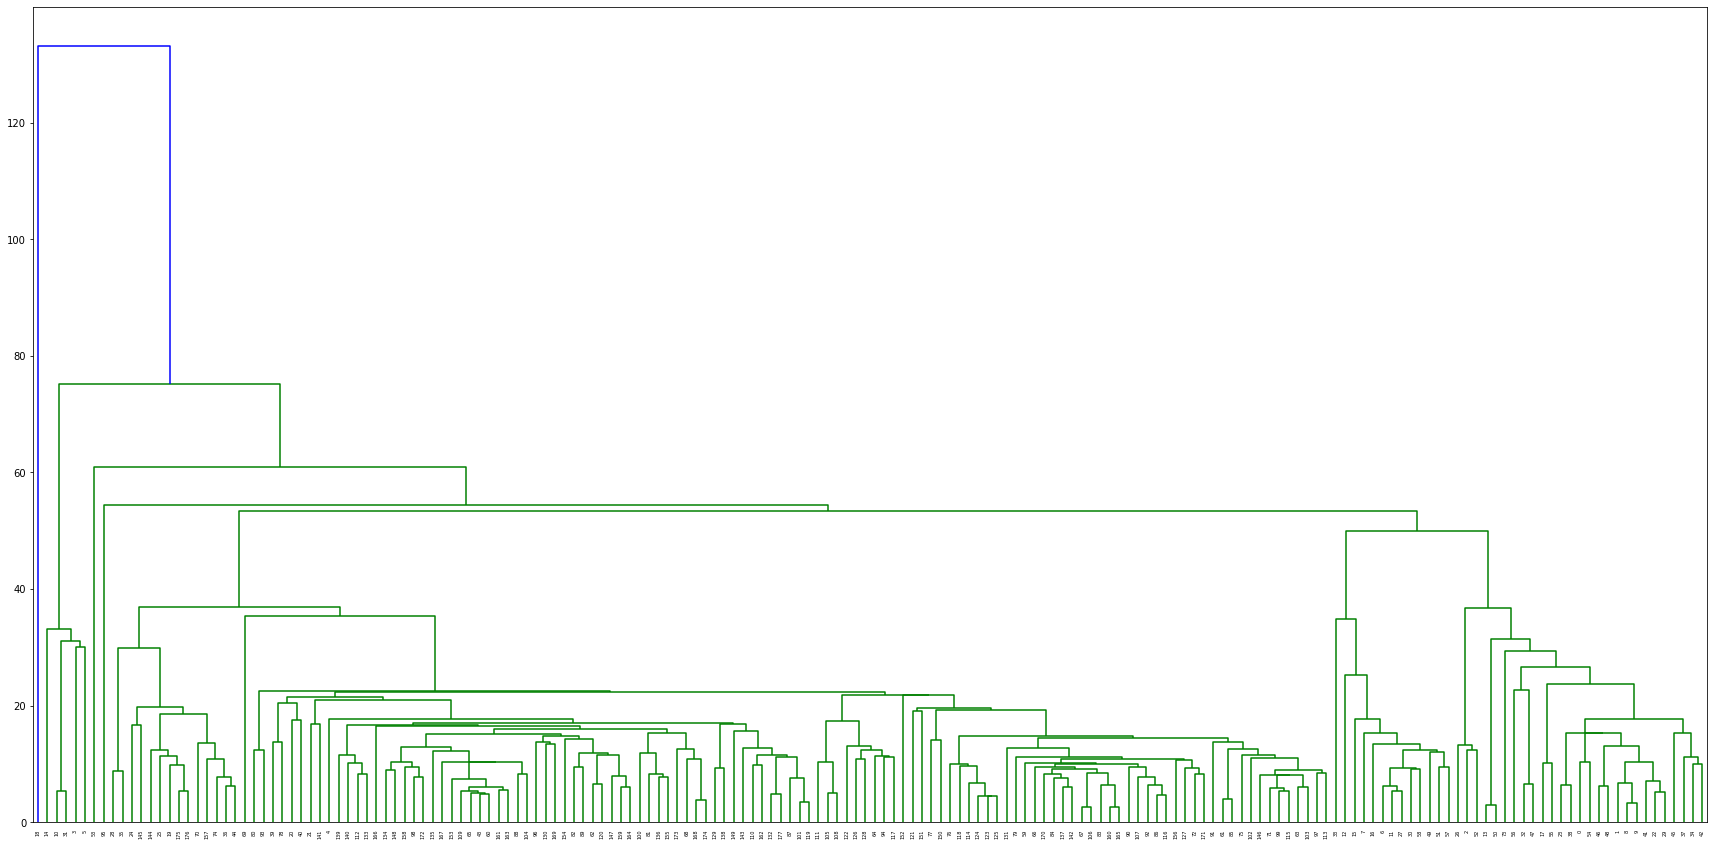

In [ ]:
plt.figure(figsize=(30,15))
dendrogram(linked2)
plt.show()

In [ ]:
linked3 = linkage(data,'average')

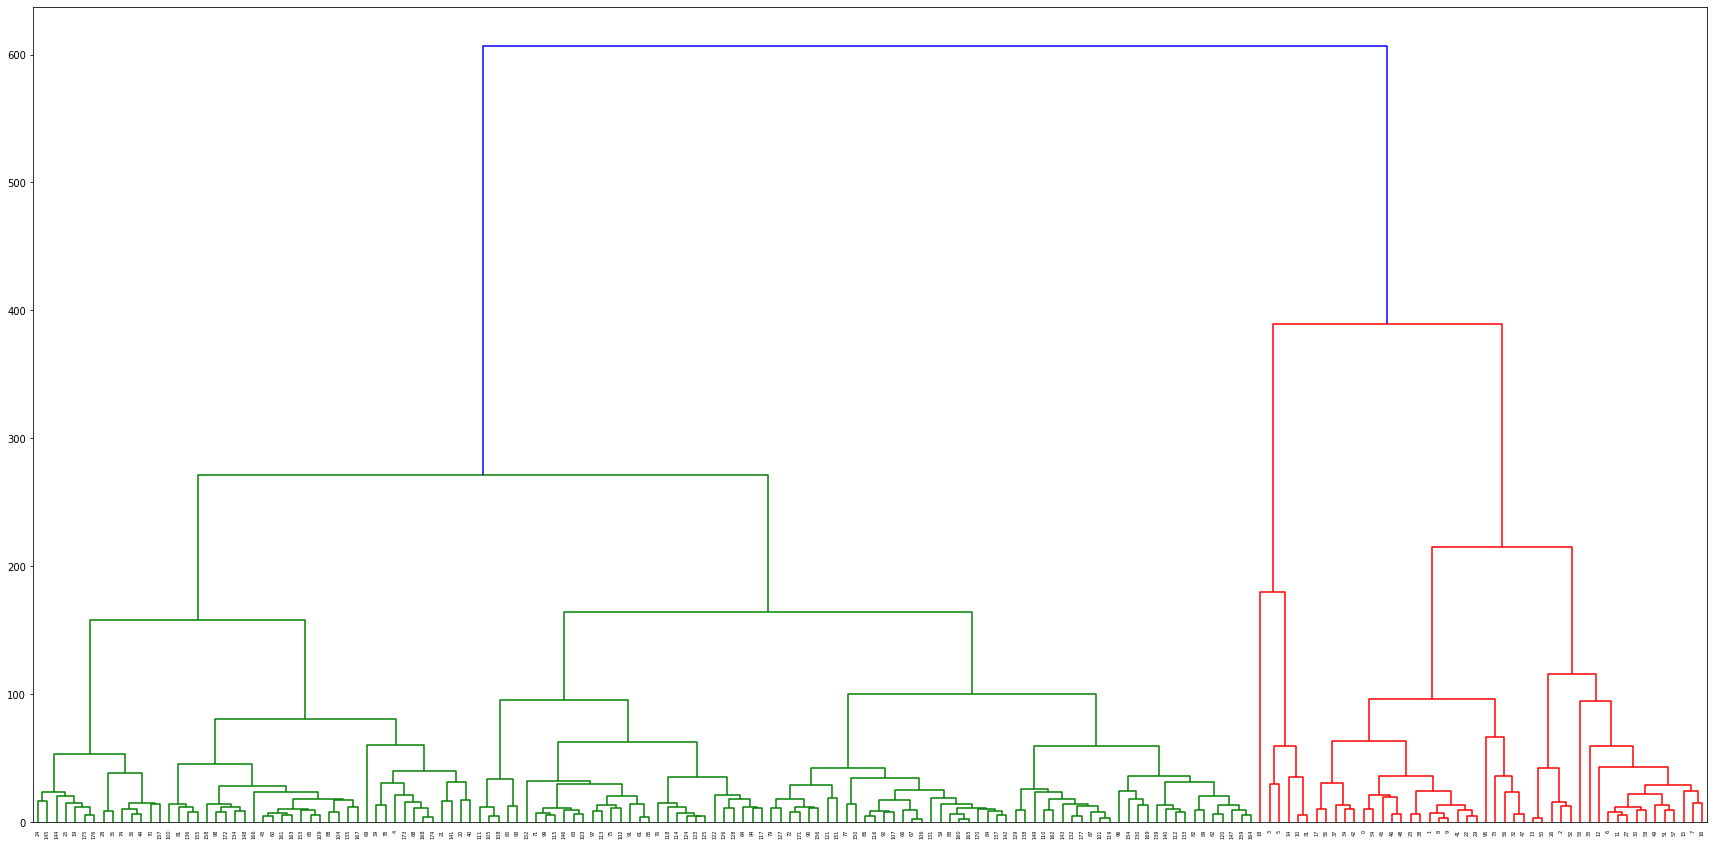

In [ ]:
plt.figure(figsize=(30,15))
dendrogram(linked3)
plt.show()

In [ ]:
scipy.spatial.distance.pdist(data, metric='euclidean', *, out=None, **kwargs)

SyntaxError: ignored

In [ ]:
wine_X = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]].values

In [ ]:
wine_Y = wine["target"]
wine_Y = np.array(wine_Y)

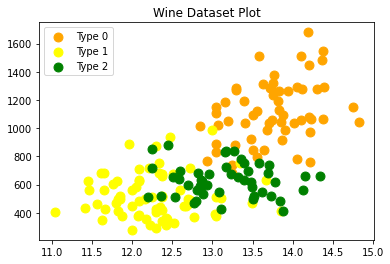

In [ ]:
plt.scatter(wine_X[wine_Y == 0, 0], wine_X[wine_Y == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[wine_Y == 1, 0], wine_X[wine_Y == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[wine_Y == 2, 0], wine_X[wine_Y == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title("Wine Dataset Plot")
plt.legend()

In [ ]:
# Wine dataset for KMeans

'''Kmeans is a kind of Unsupervised type of Clustering . It basically takes input from Dataset and predicts the clusters 
accordinly'''

from sklearn.cluster import KMeans

In [ ]:
# Calculating WCSS (within-cluster sums of squares) 

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(wine_X)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

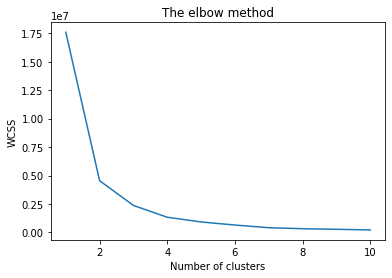

In [ ]:
# Plot the WCSS
'''Elbow-Method using WCSS: This is based on principle that while clustering performance as measured by WCSS increases (i.e. WCSS decreases) 
with increase in k, rate of increase is usually decreasing. So performance improvement for increasing number of cluster 
from, say, 3 to 4 is higher than that for increasing from 4 to 5. '''

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
# Running K-Means Model

cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(wine_X)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 3, 2, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 2, 2, 2,
       1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 1, 3, 1, 2, 2, 1, 1, 2, 2, 1, 1, 4,
       2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 2, 4, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 4, 4, 0, 0, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 2, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 4,
       4, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0,
       4, 4, 4, 4, 4, 0, 4, 4, 4, 2, 0, 4, 2, 2, 0, 4, 4, 4, 0, 0, 0, 4,
       4, 4, 0, 2, 4, 4, 0, 4, 4, 4, 4, 0, 4, 4, 2, 4, 0, 0, 4, 2, 2, 2,
       2, 4], dtype=int32)

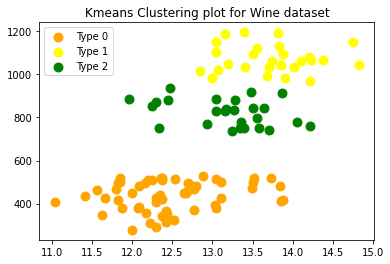

In [ ]:
# Visualizing Output
# In the above output we got value labels: ‘0’, ‘1’  and ‘2’. For a better understanding, we can visualize these clusters.

plt.scatter(wine_X[pred_kmeans == 0, 0], wine_X[pred_kmeans == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(wine_X[pred_kmeans == 1, 0], wine_X[pred_kmeans == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(wine_X[pred_kmeans == 2, 0], wine_X[pred_kmeans == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

In [ ]:
kclusters = fcluster(linked1, 3, criterion='maxclust') 
kclusters 

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 2,
       3, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       2, 3], dtype=int32)

In [ ]:
wine.corr(method ='pearson')

AttributeError: ignored

In [ ]:
import random

mylist = ["apple", "banana", "cherry"]

print(random.sample(mylist, k=2))

['apple', 'banana']


In [ ]:
linked1 = linkage(data.iloc[1:5],'complete')

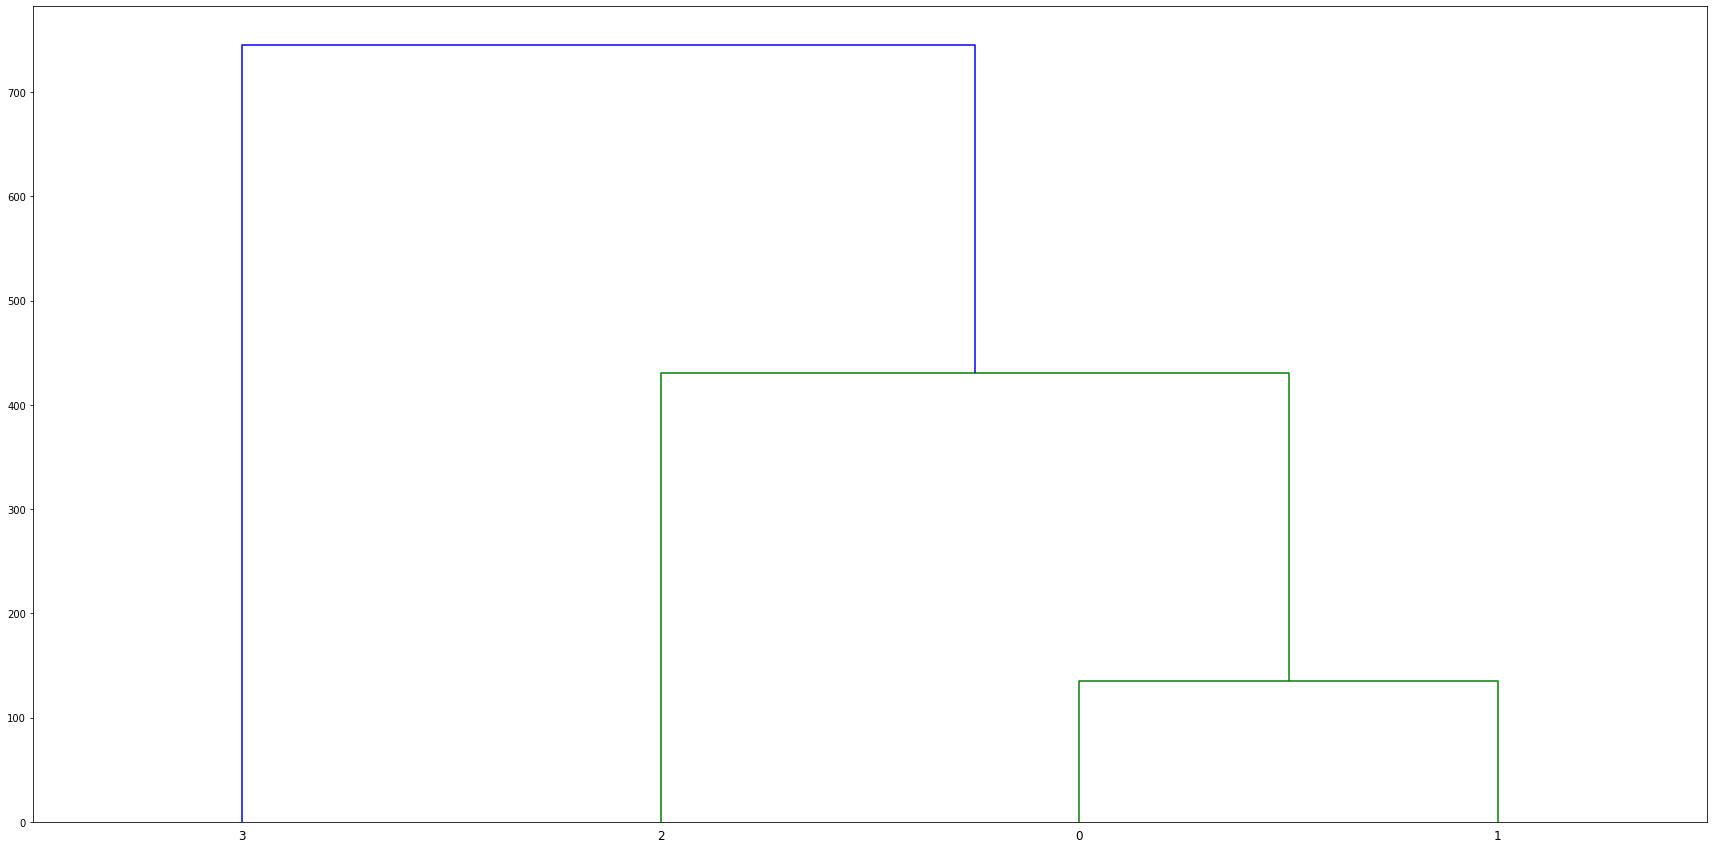

In [ ]:
plt.figure(figsize=(30,15))
dendrogram(linked1)
plt.show()

In [ ]:
linked1 = linkage(data["Flavanoids","OD280","Total_Phenols","Proanthocynins"],'complete')

KeyError: ignored

In [ ]:
linked1 = linkage(data.iloc[6:13],'complete')

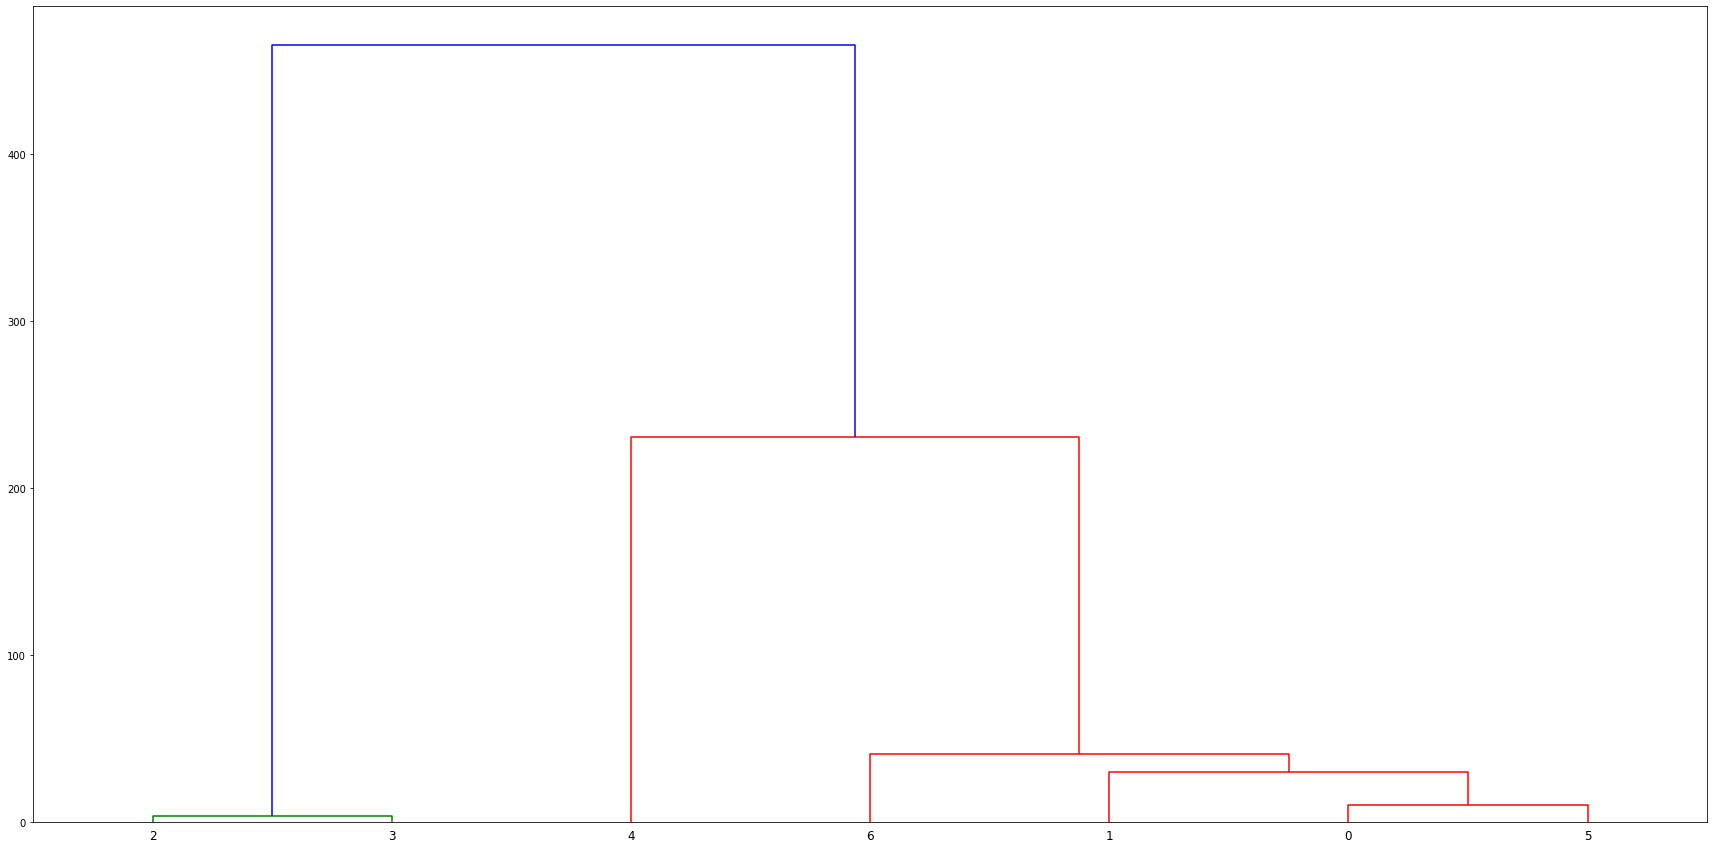

In [ ]:
plt.figure(figsize=(30,15))
dendrogram(linked1)
plt.show()

In [ ]:
linked1 = linkage(data.iloc[4:9],'single')

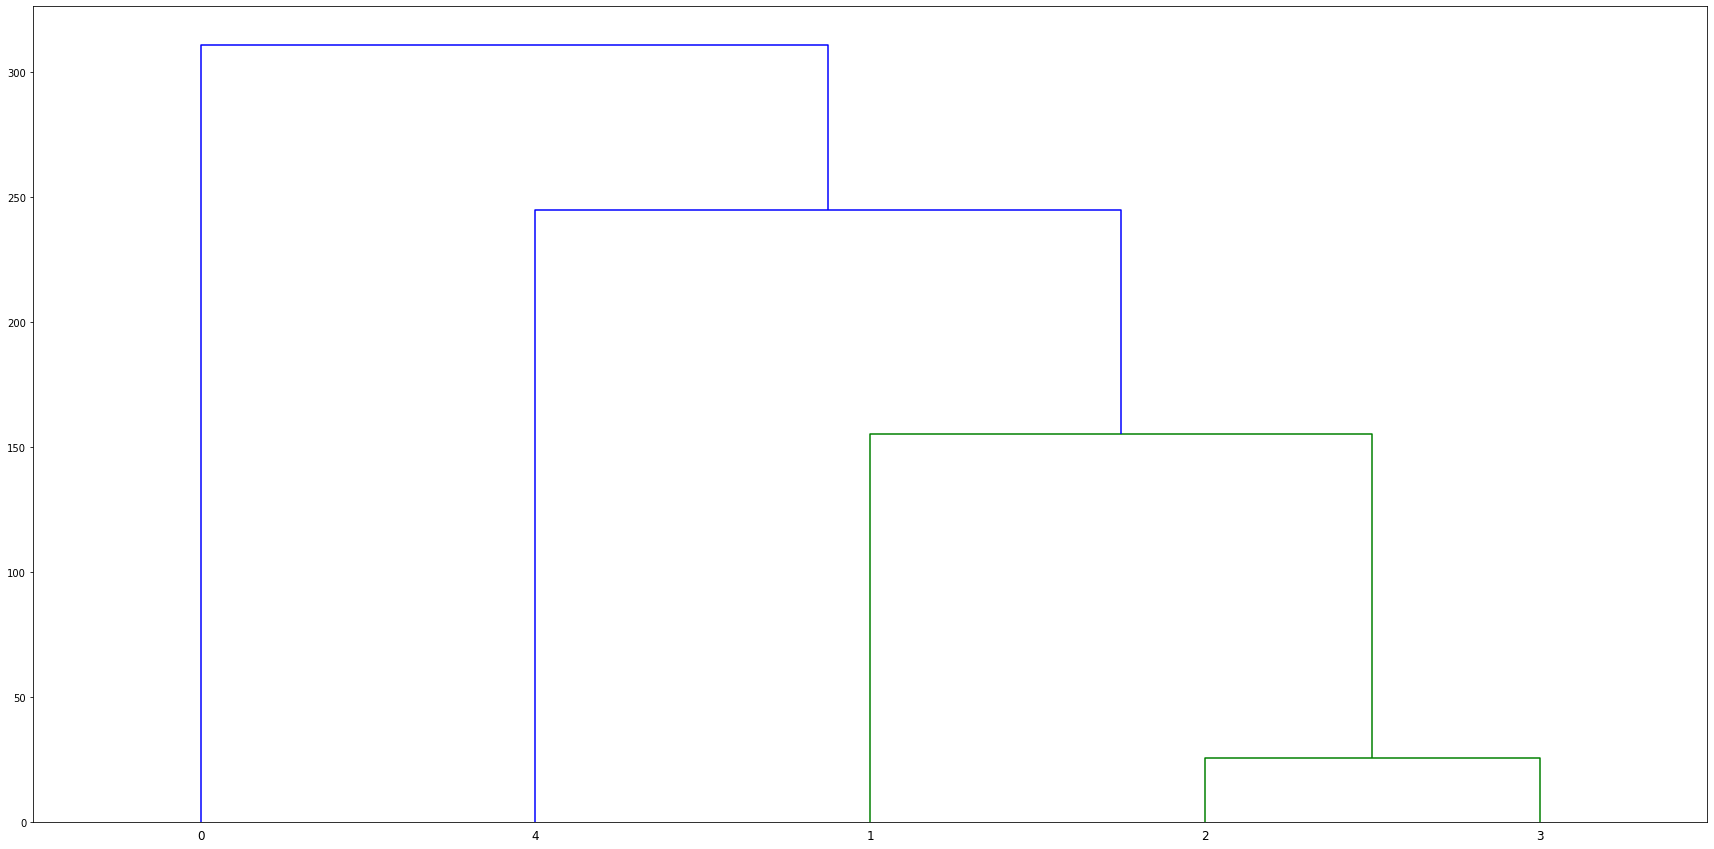

In [ ]:
plt.figure(figsize=(30,15))
dendrogram(linked1)
plt.show()